# Load the cleaned results

In [1]:
import json

with open('cleaned_results.json', 'r') as file:
    cleaned_results = json.load(file)

print(cleaned_results)

{'Compliance Report 4.pdf': {'text': '0\nResiVied 06/08/2023 - 07/07/2023\nAirView\nCompliance Report\nInitial compliance period 06/08/2028 - 07/07/2023\nCompliance met Yes\nCompliance percentage 70 %\nPayor Standard\nUsage days 22/30 days 73 % 4 hours 21 days 70 %\n4 hours 1 days 3 %\nUsage hours 149 hours 48 minutes\nAverage usage total days 5 hours 0 minutes\nAverage usage days used 6 hours 49 minutes\nMedian usage days used 6 hours 55 minutes\nTotal used hours value since last reset - 07/07/2023 276 hours: MirSanca AutoSe\nSerial number 23231350306\nMode CPAP\nSet pressure: 15 cemH20\nEPR Fulltime\nEPR level 3\nerap\nLeaks - L/min Median: 34, 5 95th percentile: 62. 6 Maximum: 72. 7\nEvents per hour Al: 4. 0 Hk: 21 AHI: 6. 1\nApnea Index Central: 1. 8 Obstructive: 0. 4 Unknown: 1. 7\nRERA Index 1. 3\nCheyne-Stokes respiration average duration per night 7 minutes 2 %\nUsage - hours\n8 10 12 14 16 18 20 22 24 26 28 30 2. 4 6\nPrinted on 07/11/2023 - ResMed Airview version 4. 41. 0-9. 

# LLM Approach #1

In [2]:
# import os
# from typing import Dict, Tuple
# import pandas as pd
# from sklearn.metrics import classification_report
# from litellm import completion
# import dotenv

# dotenv.load_dotenv()

# class LLMClassifier:
#     def __init__(self, model_name: str = "gpt-4o-mini"):
#         """
#         Initialize the document classifier with LLM support.
        
#         Args:
#             model_name: Name of the model to use
#         """
#         self.model_name = model_name

#     def classify_document(self, text: str) -> Tuple[str, float]:
#         """
#         Classify a document by directly asking the LLM for the class.

#         Args:
#             text: Document text to classify

#         Returns:
#             Tuple of (predicted_class, confidence)
#         """
#         prompt = (
#             "Classify the following document into one of the following classes: "
#             "Compliance, Sleep, Order, Delivery, Physician, or Prescription. "
#             "Provide the class and your confidence in percentage format."
#             "\n\nDocument:\n" + text
#         )
        
#         # Send the document to the LLM for classification
#         response = completion(
#             model=self.model_name,
#             messages=[{"role": "user", "content": prompt}]
#         )

#         # Extract predicted class and confidence from response
#         response_text = response.get("choices", [{}])[0].get("message", {}).get("content", "")
#         predicted_class, confidence = self.extract_class_and_confidence(response_text)
        
#         return predicted_class, confidence

#     def extract_class_and_confidence(self, response_text: str) -> Tuple[str, float]:
#         """
#         Parse LLM response to extract the predicted class and confidence.

#         Args:
#             response_text: LLM response in text format

#         Returns:
#             Tuple of (predicted_class, confidence_score as a float)
#         """
#         # Basic parsing based on expected format, e.g., "Class: [Class] Confidence: [Confidence]%"
#         lines = response_text.splitlines()
#         predicted_class = "Unknown"
#         confidence_score = 0.0

#         for line in lines:
#             if "Class:" in line:
#                 predicted_class = line.split("Class:")[1].strip()
#             elif "Confidence:" in line:
#                 confidence_score = float(line.split("Confidence:")[1].replace("%", "").strip())
        
#         return predicted_class, confidence_score

#     def evaluate_classification(self, test_data: Dict[str, Dict[str, str]]) -> pd.DataFrame:
#         """
#         Evaluate classification performance on test data.

#         Args:
#             test_data: Dictionary of test documents with their true labels
            
#         Returns:
#             DataFrame with evaluation metrics
#         """
#         predictions = []
#         true_labels = []
#         confidences = []

#         for doc_name, doc_data in test_data.items():
#             pred_class, confidence = self.classify_document(doc_data['text'])
#             print(f"Document: {doc_name} - Classified as: {pred_class} with confidence: {confidence}%")
#             predictions.append(pred_class)
#             true_labels.append(doc_data['label'])
#             confidences.append(confidence)

#         report = classification_report(true_labels, predictions, output_dict=True)
#         df_report = pd.DataFrame(report).transpose()
        
#         # Add average confidence per class
#         confidence_series = pd.Series(confidences, index=true_labels)
#         avg_confidences = confidence_series.groupby(level=0).mean()
#         df_report['avg_confidence'] = avg_confidences
        
#         return df_report


In [3]:
# classifier = LLMClassifier()

# evaluation_results = classifier.evaluate_classification(cleaned_results)

# evaluation_results

# LLM Approach #2


In [4]:
# import os
# from typing import Dict, Tuple, List
# import pandas as pd
# from sklearn.metrics import classification_report
# from litellm import completion
# import dotenv

# dotenv.load_dotenv()    

# class LLMClassifier:
#     def __init__(self, model_name: str = "gpt-4o-mini", threshold: float = 0.5):
#         """
#         Initialize the document classifier with LLM support.

#         Args:
#             model_name: Name of the model to use
#             threshold: Minimum confidence threshold for classification
#         """
#         self.model_name = model_name
#         self.threshold = threshold
#         self.label_prompts = self.create_class_prompts()

#     def create_class_prompts(self) -> Dict[str, str]:
#         """
#         Define a prompt for each class to guide the LLM in identifying document type.
#         """
#         return {
#             "Compliance": "This document should include patient compliance information regarding medical device usage and therapy adherence. It should have terms like 'compliance percentage,' 'usage hours,' 'therapy effectiveness metrics,' or similar indicators of device usage compliance.",
#             "Sleep": "This document should contain results from a clinical sleep study, such as polysomnography. Expected content includes terms like 'sleep patterns,' 'respiratory events,' 'sleep efficiency,' 'polysomnography,' and other sleep metrics.",
#             "Order": "This document should be a medical equipment or supply order form, containing details about items ordered, patient and provider information, or purchase requisition details.",
#             "Delivery": "This document is a confirmation of delivery for medical equipment or supplies. It may include terms like 'delivery receipt,' 'equipment delivered,' 'delivery confirmation,' or 'tracking details.'",
#             "Physician": "This document contains physician notes from a patient consultation or examination, likely including medical assessments, observations, treatment plans, and clinical findings.",
#             "Prescription": "This document is a medical prescription, detailing medication names, dosages, refills, and instructions for medication usage."
#         }

#     def classify_document(self, text: str) -> Tuple[str, float, Dict[str, float]]:
#         """
#         Classify a document using LLM with detailed prompts for each class.

#         Args:
#             text: Document text to classify

#         Returns:
#             Tuple of (predicted_class, confidence, all_scores)
#         """
#         scores = {}
#         for label, prompt in self.label_prompts.items():
#             response = completion(
#                 model=self.model_name,
#                 messages=[
#                     {"role": "system", "content": f"Identify if the following document matches the description: {prompt}. Return only Yes/No and confidence in percentage format."},
#                     {"role": "user", "content": text}
#                 ]
#             )
#             score = self.extract_confidence(response)
#             if score > 0.9:
#                 print(f"Classified as: {label} with confidence: {score}%")
#             scores[label] = score

#         best_class, confidence = max(scores.items(), key=lambda x: x[1])

#         if confidence < self.threshold:
#             return "Unknown", confidence, scores

#         return best_class, confidence, scores

#     def extract_confidence(self, response: dict) -> float:
#         """
#         Extract confidence level from LLM response.

#         Args:
#             response: LLM response dictionary

#         Returns:
#             Extracted confidence score as a float (0-1 range).
#         """
#         # Parse confidence level based on LLM's response 
#         response_text = response.get("choices", [{}])[0].get("message", {}).get("content", "").lower()
#         # Extract the confidence score from the response
#         if "Yes" or "Match" in response_text.lower():
#             confidence = float((response_text.split("%")[0].strip()).split(" ")[-1]) / 100
#         else:
#             confidence = 0.0
#         return confidence

#     def evaluate_classification(self, test_data: Dict) -> pd.DataFrame:
#         """
#         Evaluate classification performance on test data.

#         Args:
#             test_data: Dictionary of test documents with their true labels

#         Returns:
#             DataFrame with evaluation metrics
#         """
#         predictions = []
#         true_labels = []
#         confidences = []

#         for doc_name, doc_data in test_data.items():
#             print("Classifying the doc : ", doc_name)
#             pred_class, confidence, _ = self.classify_document(doc_data['text'])
#             print(f"Document: {doc_name} - Classified as: {pred_class} with confidence: {confidence}%\n")
#             predictions.append(pred_class)
#             true_labels.append(doc_data['label'])
#             confidences.append(confidence)

#         report = classification_report(true_labels, predictions, output_dict=True)
#         df_report = pd.DataFrame(report).transpose()
        
#         # Add average confidence per class
#         confidence_series = pd.Series(confidences, index=true_labels)
#         avg_confidences = confidence_series.groupby(level=0).mean()
#         df_report['avg_confidence'] = avg_confidences
        
#         return df_report

#     def classify_and_save(self, doc_data: Dict[str, str], save_path: str) -> None:
#         """
#         Classify and save results to a specified path.

#         Args:
#             doc_data: Dictionary of documents to classify
#             save_path: Path to save the results
#         """
#         results = []
#         for doc_id, text in doc_data.items():
#             pred_class, confidence, _ = self.classify_document(text)
#             results.append({"document_id": doc_id, "predicted_class": pred_class, "confidence": confidence})

#         df_results = pd.DataFrame(results)
#         df_results.to_csv(save_path, index=False)


In [5]:
# classifier = LLMClassifier()

# subset = {k: cleaned_results[k] for k in list(cleaned_results.keys())[4:8]}

# evaluation_results = classifier.evaluate_classification(cleaned_results)

# evaluation_results

# LLM Approach #3



In [6]:
# import os
# from typing import Dict, Tuple
# import pandas as pd
# from sklearn.metrics import classification_report
# from litellm import completion
# import dotenv

# dotenv.load_dotenv()    

# class LLMSingleDocumentClassifier:
#     def __init__(self, model_name: str = "gpt-3.5-turbo", threshold: float = 0.5):
#         """
#         Initialize the document classifier with LLM support on a per-document basis.

#         Args:
#             model_name: Name of the model to use
#             threshold: Minimum confidence threshold for classification
#         """
#         self.model_name = model_name
#         self.threshold = threshold
#         self.examples = self.create_few_shot_examples()

#     def create_few_shot_examples(self) -> str:
#         """
#         Create few-shot examples for each class to include in the prompt.
#         """
#         return """
#         Examples:
#         Document: "ResMed AirView Compliance Report PATIENT INFO: Name: John Doe, ID: 987654321, DOB: 04/25/1968. COMPLIANCE PERIOD: 09/01/2023 - 09/30/2023. COMPLIANCE SUMMARY: Compliance Met: Yes, Compliance Percentage: 85%. USAGE DETAILS: Total Usage Days: 25/30 days (83%), Days with ≥ 4 hours usage: 23 days (77%). Total Usage Hours: 176 hours 45 minutes. Average Usage (All Days): 5 hours 54 minutes, Average Usage (Days Used): 7 hours 21 minutes. Median Usage (Days Used): 7 hours 30 minutes. DEVICE INFO: Device Model: AirSense 11 AutoSet, Serial Number: 22334455667. SETTINGS: Mode: AutoSet, Min Pressure: 6 cmH2O, Max Pressure: 15 cmH2O, EPR: Fulltime, EPR Level: 2. PERFORMANCE METRICS: Leak Rate - Median: 12.4 L/min, 95th Percentile: 28.7 L/min, Max: 35.1 L/min. Events Per Hour - AI: 2.2, HI: 1.3, AHI: 3.5. Apnea Index - Central: 0.8, Obstructive: 1.4, Unknown: 0.0. RECOMMENDATION: Continue current settings; follow up in 3 months to re-evaluate compliance and usage patterns."
#         Class: Compliance_Report
#         Confidence: High

#         Document: "Date: 05/12/2023 FAX No: 123-456-7890 Institute of Sleep Medicine, Sleep Study Report. PATIENT INFO: Name: Jane Doe, ID: 987654, Age: 52, Gender: Female, BMI: 28.4. TEST DATE: 05/10/2023. REASON FOR STUDY: Evaluate for obstructive sleep apnea due to symptoms of daytime sleepiness and loud snoring. STUDY DETAILS: Overnight polysomnography was conducted, including continuous monitoring of airflow, respiratory effort, heart rate, and oxygen saturation. RESULTS SUMMARY: Total recording time: 7 hours, with sleep time of 5 hours 15 minutes. Apnea-hypopnea index (AHI) calculated at 22.5, indicating moderate obstructive sleep apnea. Lowest oxygen saturation observed at 84%. DIAGNOSIS & RECOMMENDATIONS: Diagnosis confirmed as moderate obstructive sleep apnea. Recommended treatment includes CPAP therapy with an initial pressure setting of 8 cmH2O, to be reviewed after 4 weeks. Patient advised on sleep hygiene practices and to avoid sedatives and alcohol."
#         Class: Sleep_Study_Report
#         Confidence: High

#         Document: "Sleep Health Institute, Home Sleep Study Report. PATIENT DEMOGRAPHICS: John Smith, ID: 102938, Date of Birth: 08/23/1975, Weight: 200 lbs, Height: 5’9”, BMI: 29.5. STUDY OVERVIEW: The patient underwent a home sleep apnea test on 06/15/2023 to assess breathing irregularities and excessive daytime sleepiness. STUDY RESULTS: Total sleep time recorded: 6 hours and 30 minutes. Respiratory events included 15 obstructive apneas, 3 central apneas, and 42 hypopneas, resulting in an AHI of 19. Oxygen saturation levels dropped below 90% for 12% of the night, with a minimum of 82%. CLINICAL IMPRESSION: Mild obstructive sleep apnea with potential for progression. RECOMMENDATIONS: Suggest initiating CPAP therapy at an auto-adjusting range of 5-15 cmH2O. Scheduled follow-up in 1 month to evaluate compliance. Advised to maintain a healthy weight and avoid alcohol and sedative medications."
#         Class: Sleep_Study_Report
#         Confidence: High

#         Document: "DATE: 08/15/2023 FAX: 555-123-4567 Medical Equipment Order Form PATIENT INFORMATION: Name: Alice Johnson, DOB: 06/10/1965, ID: 123456789. ORDER DETAILS: ORDER DATE: 08/14/2023. DIAGNOSIS: Obstructive Sleep Apnea (ICD-10 G47.33). EQUIPMENT REQUIRED: - ResMed AirSense 10 CPAP Machine, - Heated Humidifier (Code: E0562), - Full Face Mask (Code: A7030), - SlimLine Tubing (Code: A7037, 1 per 3 months), - Disposable Filters (Code: A7038, 2 per month). SUPPLY FREQUENCY: Filters to be replaced monthly, tubing every 3 months, mask every 6 months. NOTES: Please schedule initial setup within 3 business days. Fax confirmation of order receipt and anticipated setup date to 555-987-6543. Signature: Dr. Henry Lewis, NPI: 1234567890, Date: 08/15/2023."
#         Class: Order
#         Confidence: High

#         Document: "Standard Written Order - Medical Equipment Provider: HomeCare Solutions, Inc. PATIENT: Name: Michael Brown, DOB: 09/22/1958. Order Date: 09/01/2023. LENGTH OF NEED: Lifetime or 99 months. DIAGNOSIS: Chronic obstructive sleep apnea (ICD-10 G47.33). PRESCRIBED EQUIPMENT/SERVICES: - CPAP Machine Model: AirCurve 10, - Heated Humidifier (Code: E0562), - Nasal Pillow Mask (Code: A7034, 1 per month), - Chin Strap (Code: A7036, 1 per 6 months), - Filter Set (Code: A7038, 2 per month), - Water Chamber (Code: A7046, 1 per 6 months). AUTHORIZATION: Approved for insurance coverage. Provider to confirm order receipt and schedule delivery within 2 days. Contact our office at 555-456-7890 with any issues regarding setup or supply limitations. Provider Signature: Dr. Linda Roberts, Date: 09/01/2023."
#         Class: Order
#         Confidence: High

#         Document: "DELIVERY RECEIPT Provider: Care Medical Supplies Inc. Delivery Location: 1234 Main St., Suite 500, Orlando, FL 32801, Phone: 407-555-6789. DELIVERY DETAILS: Delivery Date: 09/15/2023, CSR: Jane Doe. PATIENT INFO: Name: James Smith, DOB: 03/14/1956, Account Number: 456789123. Insurance: UnitedHealthcare, HIPAA Signature on file: Yes. DELIVERY ITEMS: - Item: CPAP Machine, Model: AirSense 10, Serial Number: 987654321, Quantity: 1, Type: Rental, Unit Price: $65.00, Total: $65.00. - Item: Heated Humidifier, Code: E0562, Quantity: 1, Type: Purchase, Unit Price: $150.00, Total: $150.00. - Item: Nasal Mask, Model: ComfortGel Blue, Size: Medium, Quantity: 1, Type: Purchase, Unit Price: $60.00, Total: $60.00. - Item: Tubing, Model: SlimLine, Quantity: 1, Type: Purchase, Unit Price: $20.00, Total: $20.00. PAYMENT DETAILS: Payment Method: Insurance Billing, Co-pay: $0.00, Total Amount Due: $295.00. SPECIAL INSTRUCTIONS: Ensure delivery confirmation signature is obtained. Initial setup instructions provided to patient."
#         Class: Delivery_Ticket
#         Confidence: High

#         Document: "7/17/2023 10:20 AM FROM: Page 1 of 17\n1. Follow\nNye\nup: Sleep stucy results\nTaking\n6 Bisacodyl 5 MG Tablet Delayed\nRelease 1 tablet as needed Orally\nOnce a day Gemfibrozil 600 MG Tablet
#         Class: Physician_Notes
#         Confidence: High

#         Document: "HCMG Pulmonary Date: Apr 27, 2023\n4725 N Federal Hwy, Ste 203\nFort Lauderdale FL 33308-4603\nCPAP DME Order ID: 701783674\nOrder Date: 4/27/2023\nDiagnosis: Obstructive sleep apnea, adult G47. 33\nQuantity: 1\nHeight: Weight: Scheduling Instructions: If the AHI or RDI is calculated based on less than 2 hours of sleep or recording time, the\ntotal number of recorded events used to calculate the AHI or RD must be at least the number of events that would\nhave been required in a 2 hour period.\nThe face-to-face evaluation was completed by: Reasons for Script: New prescription AND ALL RELATED SUPPLIES\nAdditional providers who completed a face to face evaluation of the patient: SORHAGE, FRANK 50595\nChanges Only: AUTO UNIT L5/H20\nTubing: A7037 Reusable tubing 1/3mo\nTubing: A4604 Heated tubing 1/3mo\nType of Interface and Accessories: A7038 Disposable filter 2/1mo MASK FIT TO PATIENTS COMFORT\nType of Interface and Accessories: A7039 Reusable filter 1/6mo\nType of interface and Accessories: A4604 Heated tubing 1/3mo\nType of interface and Accessories: A7046 Humidifier Chamber 1/6mo\nLength of Need 12 Months: 99\nThe AHI is from 5 to 14 events per hour with documented symptoms of: OSA G47. 33\nINSURANCE PAYOR PLAN GROUP SUBSCRIB\nERID\nPrimary: MEDICARE 40000101\nSecondary: AARP 10000701\nElectronically Signed by\non Apr 27, 2023, at 5:18"
#         Class: Prescription
#         Confidence: High
#         """

#     def classify_single_document(self, doc_id: str, text: str) -> Tuple[str, float]:
#         """
#         Classify a single document using LLM with few-shot examples.

#         Args:
#             doc_id: Document ID for tracking
#             text: Document text to classify

#         Returns:
#             Tuple of (predicted_class, confidence_score)
#         """
#         prompt = f"""
#         {self.examples}
        
#         Classify the following document into one of the classes: Compliance, Sleep, Order, Delivery, Physician, Prescription.
#         Format the result as:
#         "Document {doc_id} - Class: [Predicted Class] - Confidence: [Low, Medium, High]"

#         Document: "{text}"
#         """
        
#         # Make the single API call for this document
#         response = completion(
#             model=self.model_name,
#             messages=[{"role": "user", "content": prompt}]
#         )

#         # Parse the LLM response
#         response_text = response.get("choices", [{}])[0].get("message", {}).get("content", "")
        
#         # Extract the result based on the enforced format
#         parts = response_text.split(" - ")
#         predicted_class = parts[1].split(": ")[1] if len(parts) > 1 else "Unknown"
#         confidence_str = parts[2].split(": ")[1] if len(parts) > 2 else "Low"
#         confidence_score = {"Low": 0.3, "Medium": 0.6, "High": 0.9}.get(confidence_str, 0.5)
        
#         return predicted_class, confidence_score

#     def classify_documents(self, documents: Dict[str, str]) -> Dict[str, Tuple[str, float]]:
#         """
#         Classify multiple documents individually.

#         Args:
#             documents: Dictionary of document texts keyed by document IDs

#         Returns:
#             Dictionary with document IDs as keys and tuples of (predicted_class, confidence_score)
#         """
#         classification_results = {}
#         for doc_id, text in documents.items():
#             predicted_class, confidence_score = self.classify_single_document(doc_id, text)
#             if "Physician" in predicted_class:
#                 predicted_class = "Physician"
#             elif "Prescription" in predicted_class:
#                 predicted_class = "Prescription"
#             elif "Delivery" in predicted_class:
#                 predicted_class = "Delivery"
#             elif "Sleep" in predicted_class:
#                 predicted_class = "Sleep"
#             elif "Compliance" in predicted_class:
#                 predicted_class = "Compliance"
#             elif "Order" in predicted_class:
#                 predicted_class = "Order"

#             print(f"Document: {doc_id} - Classified as: {predicted_class} with confidence: {confidence_score}%")
#             classification_results[doc_id] = (predicted_class, confidence_score)
        
#         return classification_results

#     def evaluate_classification(self, test_data: Dict[str, Dict[str, str]]) -> pd.DataFrame:
#         """
#         Evaluate classification performance on test data.

#         Args:
#             test_data: Dictionary of test documents with their true labels
            
#         Returns:
#             DataFrame with evaluation metrics
#         """
#         predictions = []
#         true_labels = []
#         confidences = []

#         classified_results = self.classify_documents({doc_id: data['text'] for doc_id, data in test_data.items()})

#         for doc_id, (pred_class, confidence) in classified_results.items():
#             true_labels.append(test_data[doc_id]['label'])
#             predictions.append(pred_class)
#             confidences.append(confidence)

#         report = classification_report(true_labels, predictions, output_dict=True)
#         df_report = pd.DataFrame(report).transpose()

#         # Add average confidence per class
#         confidence_series = pd.Series(confidences, index=true_labels)
#         avg_confidences = confidence_series.groupby(level=0).mean()
#         df_report['avg_confidence'] = avg_confidences

#         return df_report


# Load the cleaned results

In [7]:
# import json

# with open('cleaned_results.json', 'r') as file:
#     cleaned_results = json.load(file)

# print(cleaned_results)

In [8]:
# classifier = LLMSingleDocumentClassifier()

# evaluation_results = classifier.evaluate_classification(cleaned_results)

# evaluation_results

# LLM Approach #3.1


In [9]:
# class LLMFewShotClassifier:
#     def __init__(self, model_name: str = "gpt-3.5-turbo", threshold: float = 0.5):
#         """
#         Initialize the document classifier with LLM using a few-shot approach.
        
#         Args:
#             model_name: Name of the model to use
#             threshold: Minimum confidence threshold for classification
#         """
#         self.model_name = model_name
#         self.threshold = threshold
#         self.examples = self.create_few_shot_examples()

#     def create_few_shot_examples(self) -> str:
#         """
#         Create few-shot examples for each class to include in the prompt.
#         """
#         return """
#         Examples:
#         Document: "ResiVied 06/08/2023 - 07/07/2023 Compliance Report ..."
#         Class: Compliance
#         Confidence: High

#         Document: "MAR/27/2023/MON 03:01 PM MUSC Sleep Study Report ..."
#         Class: Sleep
#         Confidence: High

#         Document: "Order Date: 03/16/2023 MUSC Medical Supply Order ..."
#         Class: Order
#         Confidence: High

#         Document: "DELIVERY RECEIPT American HomeCare Equipment Oxygen ..."
#         Class: Delivery
#         Confidence: High

#         Document: "Physician assessment on 07/17/2023 with diagnosis plan ..."
#         Class: Physician
#         Confidence: High

#         Document: "Prescription for medication with dosing instructions ..."
#         Class: Prescription
#         Confidence: High
#         """

#     def classify_documents(self, documents: Dict[str, str]) -> Dict[str, Tuple[str, float]]:
#         """
#         Classify multiple documents in a single LLM call using a few-shot prompt.

#         Args:
#             documents: Dictionary of document texts keyed by document IDs
            
#         Returns:
#             Dictionary with document IDs as keys and tuples of (predicted_class, confidence_score)
#         """
#         # Prepare the prompt with few-shot examples and all document texts
#         document_texts = "\n".join([f"Document {doc_id}: {text}" for doc_id, text in documents.items()])
        
#         prompt = f"""
#         {self.examples}
        
#         Classify the following documents into one of the classes: Compliance, Sleep, Order, Delivery, Physician, Prescription.
#         Format each result as:
#         "Document X - Class: [Predicted Class] - Confidence: [Low, Medium, High]"
        
#         {document_texts}
#         """
        
#         # Make the single API call
#         response = completion(
#             model=self.model_name,
#             messages=[{"role": "user", "content": prompt}]
#         )

#         # Parse the LLM response
#         classification_results = {}
#         response_text = response.get("choices", [{}])[0].get("message", {}).get("content", "")
        
#         # Extract results for each document based on enforced format
#         for line in response_text.splitlines():
#             if "Document" in line:
#                 parts = line.split(" - ")
#                 doc_id = parts[0].split()[1]
#                 predicted_class = parts[1].split(": ")[1]
#                 confidence_str = parts[2].split(": ")[1]
#                 confidence_score = {"Low": 0.3, "Medium": 0.6, "High": 0.9}.get(confidence_str, 0.5)
                
#                 # Save to dictionary
#                 classification_results[doc_id] = (predicted_class, confidence_score)
                
#         return classification_results

#     def evaluate_classification(self, test_data: Dict[str, Dict[str, str]]) -> pd.DataFrame:
#         """
#         Evaluate classification performance on test data.

#         Args:
#             test_data: Dictionary of test documents with their true labels
            
#         Returns:
#             DataFrame with evaluation metrics
#         """
#         predictions = []
#         true_labels = []
#         confidences = []

#         classified_results = self.classify_documents({doc_id: data['text'] for doc_id, data in test_data.items()})

#         for doc_id, (pred_class, confidence) in classified_results.items():
#             print(f"Document: {doc_id} - Classified as: {pred_class} with confidence: {confidence}%")
#             print(f"True label: {classified_results}")
#             true_labels.append(test_data[doc_id]['label'])
#             predictions.append(pred_class)
#             confidences.append(confidence)

#         report = classification_report(true_labels, predictions, output_dict=True)
#         df_report = pd.DataFrame(report).transpose()

#         # Add average confidence per class
#         confidence_series = pd.Series(confidences, index=true_labels)
#         avg_confidences = confidence_series.groupby(level=0).mean()
#         df_report['avg_confidence'] = avg_confidences

#         return df_report

In [10]:
# classifier = LLMFewShotClassifier()

# evaluation_results = classifier.evaluate_classification(subset)

# evaluation_results

# LLM Approach #4

In [11]:
from sklearn.metrics import classification_report, roc_auc_score, roc_curve, auc
from sklearn.preprocessing import LabelBinarizer
import pandas as pd
import matplotlib.pyplot as plt
from typing import Dict, Tuple, List
import os
from typing import Dict, Tuple, List
import pandas as pd
from sklearn.metrics import classification_report
from litellm import completion
import dotenv

dotenv.load_dotenv()    

class LLMClassifier:
    def __init__(self, model_name: str = "gpt-4o-mini", threshold: float = 0.5):
        """
        Initialize the document classifier with LLM support.

        Args:
            model_name: Name of the model to use
            threshold: Minimum confidence threshold for classification
        """
        self.model_name = model_name
        self.threshold = threshold
        self.label_prompts = self.create_class_prompts()
        self.examples = self.create_few_shot_examples()  # Full examples to use selectively

    def create_class_prompts(self) -> Dict[str, str]:
        """
        Define a prompt for each class to guide the LLM in identifying document type.
        """
        return {
            "Compliance": "This document should include patient compliance information regarding medical device usage and therapy adherence. It should have terms like 'compliance percentage,' 'usage hours,' 'therapy effectiveness metrics,' or similar indicators of device usage compliance.",
            "Sleep": "This document should contain results from a clinical sleep study, such as polysomnography. Expected content includes terms like 'sleep patterns,' 'respiratory events,' 'sleep efficiency,' 'polysomnography,' and other sleep metrics.",
            "Order": "This document should be a medical equipment or supply order form, containing details about items ordered, patient and provider information, or purchase requisition details.",
            "Delivery": "This document is a confirmation of delivery for medical equipment or supplies. It may include terms like 'delivery receipt,' 'equipment delivered,' 'delivery confirmation,' or 'tracking details.'",
            "Physician": "This document contains physician notes from a patient consultation or examination, likely including medical assessments, observations, treatment plans, and clinical findings.",
            "Prescription": "This document is a medical prescription, detailing medication names, dosages, refills, and instructions for medication usage."
        }

    def create_few_shot_examples(self) -> Dict[str, str]:
        """
        Create full few-shot examples for each class to use selectively.
        """
        return {
            "Compliance": """
            Document: "ResMed AirView Compliance Report PATIENT INFO: Name: John Doe, ID: 987654321, DOB: 04/25/1968. COMPLIANCE PERIOD: 09/01/2023 - 09/30/2023. COMPLIANCE SUMMARY: Compliance Met: Yes, Compliance Percentage: 85%. USAGE DETAILS: Total Usage Days: 25/30 days (83%), Days with ≥ 4 hours usage: 23 days (77%). Total Usage Hours: 176 hours 45 minutes. Average Usage (All Days): 5 hours 54 minutes, Average Usage (Days Used): 7 hours 21 minutes. Median Usage (Days Used): 7 hours 30 minutes. DEVICE INFO: Device Model: AirSense 11 AutoSet, Serial Number: 22334455667. SETTINGS: Mode: AutoSet, Min Pressure: 6 cmH2O, Max Pressure: 15 cmH2O, EPR: Fulltime, EPR Level: 2. PERFORMANCE METRICS: Leak Rate - Median: 12.4 L/min, 95th Percentile: 28.7 L/min, Max: 35.1 L/min. Events Per Hour - AI: 2.2, HI: 1.3, AHI: 3.5. Apnea Index - Central: 0.8, Obstructive: 1.4, Unknown: 0.0. RECOMMENDATION: Continue current settings; follow up in 3 months to re-evaluate compliance and usage patterns."
            Class: Compliance_Report
            Confidence: High
            """,
            
            "Sleep": """
            Document: "Date: 05/12/2023 FAX No: 123-456-7890 Institute of Sleep Medicine, Sleep Study Report. PATIENT INFO: Name: Jane Doe, ID: 987654, Age: 52, Gender: Female, BMI: 28.4. TEST DATE: 05/10/2023. REASON FOR STUDY: Evaluate for obstructive sleep apnea due to symptoms of daytime sleepiness and loud snoring. STUDY DETAILS: Overnight polysomnography was conducted, including continuous monitoring of airflow, respiratory effort, heart rate, and oxygen saturation. RESULTS SUMMARY: Total recording time: 7 hours, with sleep time of 5 hours 15 minutes. Apnea-hypopnea index (AHI) calculated at 22.5, indicating moderate obstructive sleep apnea. Lowest oxygen saturation observed at 84%. DIAGNOSIS & RECOMMENDATIONS: Diagnosis confirmed as moderate obstructive sleep apnea. Recommended treatment includes CPAP therapy with an initial pressure setting of 8 cmH2O, to be reviewed after 4 weeks. Patient advised on sleep hygiene practices and to avoid sedatives and alcohol."
            Class: Sleep_Study_Report
            Confidence: High
            """,

            "Order": """
            Document: "DATE: 08/15/2023 FAX: 555-123-4567 Medical Equipment Order Form PATIENT INFORMATION: Name: Alice Johnson, DOB: 06/10/1965, ID: 123456789. ORDER DETAILS: ORDER DATE: 08/14/2023. DIAGNOSIS: Obstructive Sleep Apnea (ICD-10 G47.33). EQUIPMENT REQUIRED: - ResMed AirSense 10 CPAP Machine, - Heated Humidifier (Code: E0562), - Full Face Mask (Code: A7030), - SlimLine Tubing (Code: A7037, 1 per 3 months), - Disposable Filters (Code: A7038, 2 per month). SUPPLY FREQUENCY: Filters to be replaced monthly, tubing every 3 months, mask every 6 months. NOTES: Please schedule initial setup within 3 business days. Fax confirmation of order receipt and anticipated setup date to 555-987-6543. Signature: Dr. Henry Lewis, NPI: 1234567890, Date: 08/15/2023."
            Class: Order
            Confidence: High
            """,

            "Delivery": """
            Document: "DELIVERY RECEIPT Provider: Care Medical Supplies Inc. Delivery Location: 1234 Main St., Suite 500, Orlando, FL 32801, Phone: 407-555-6789. DELIVERY DETAILS: Delivery Date: 09/15/2023, CSR: Jane Doe. PATIENT INFO: Name: James Smith, DOB: 03/14/1956, Account Number: 456789123. Insurance: UnitedHealthcare, HIPAA Signature on file: Yes. DELIVERY ITEMS: - Item: CPAP Machine, Model: AirSense 10, Serial Number: 987654321, Quantity: 1, Type: Rental, Unit Price: $65.00, Total: $65.00. - Item: Heated Humidifier, Code: E0562, Quantity: 1, Type: Purchase, Unit Price: $150.00, Total: $150.00. - Item: Nasal Mask, Model: ComfortGel Blue, Size: Medium, Quantity: 1, Type: Purchase, Unit Price: $60.00, Total: $60.00. - Item: Tubing, Model: SlimLine, Quantity: 1, Type: Purchase, Unit Price: $20.00, Total: $20.00. PAYMENT DETAILS: Payment Method: Insurance Billing, Co-pay: $0.00, Total Amount Due: $295.00. SPECIAL INSTRUCTIONS: Ensure delivery confirmation signature is obtained. Initial setup instructions provided to patient."
            Class: Delivery_Ticket
            Confidence: High
            """,

            "Physician": """
            Document: "7/17/2023 10:20 AM FROM: Page 1 of 17\n1. Follow\nNye\nup: Sleep stucy results\nTaking\n6 Bisacodyl 5 MG Tablet Delayed\nRelease 1 tablet as needed Orally\nOnce a day Gemfibrozil 600 MG Tablet"
            Class: Physician_Notes
            Confidence: High
            """,

            "Prescription": """
            Document: "HCMG Pulmonary Date: Apr 27, 2023\n4725 N Federal Hwy, Ste 203\nFort Lauderdale FL 33308-4603\nCPAP DME Order ID: 701783674\nOrder Date: 4/27/2023\nDiagnosis: Obstructive sleep apnea, adult G47.33\nQuantity: 1\nHeight: Weight: Scheduling Instructions: If the AHI or RDI is calculated based on less than 2 hours of sleep or recording time, the total number of recorded events used to calculate the AHI or RD must be at least the number of events that would have been required in a 2 hour period.\nThe face-to-face evaluation was completed by: Reasons for Script: New prescription AND ALL RELATED SUPPLIES\nAdditional providers who completed a face to face evaluation of the patient: SORHAGE, FRANK 50595\nChanges Only: AUTO UNIT L5/H20\nTubing: A7037 Reusable tubing 1/3mo\nTubing: A4604 Heated tubing 1/3mo\nType of Interface and Accessories: A7038 Disposable filter 2/1mo MASK FIT TO PATIENTS COMFORT\nType of Interface and Accessories: A7039 Reusable filter 1/6mo\nType of interface and Accessories: A4604 Heated tubing 1/3mo\nType of interface and Accessories: A7046 Humidifier Chamber 1/6mo\nLength of Need 12 Months: 99\nThe AHI is from 5 to 14 events per hour with documented symptoms of: OSA G47.33\nINSURANCE PAYOR PLAN GROUP SUBSCRIBER ID\nPrimary: MEDICARE 40000101\nSecondary: AARP 10000701\nElectronically Signed by\non Apr 27, 2023, at 5:18"
            Class: Prescription
            Confidence: High
            """
        }


    def classify_document(self, text: str) -> Tuple[str, float, Dict[str, float]]:
        """
        Classify a document using LLM and determine if it belongs to exactly one class.

        Args:
            text: Document text to classify

        Returns:
            Tuple of (predicted_class, confidence, all_scores)
        """
        scores = {}
        for label, prompt in self.label_prompts.items():
            response = completion(
                model=self.model_name,
                messages=[
                    {"role": "system", "content": f"Identify if the following document matches the description: {prompt}. Return only Yes/No and confidence in percentage format."},
                    {"role": "user", "content": text}
                ]
            )
            score = self.extract_confidence(response)
            scores[label] = score

        # Filter classes with high confidence ("Yes" responses)
        high_confidence_classes = {label: conf for label, conf in scores.items() if conf >= self.threshold}
        
        # Check for unique high-confidence classification
        if len(high_confidence_classes) == 1:
            predicted_class = next(iter(high_confidence_classes))
            if "Physician" in predicted_class:
                predicted_class = "Physician"
            elif "Prescription" in predicted_class:
                predicted_class = "Prescription"
            elif "Delivery" in predicted_class:
                predicted_class = "Delivery"
            elif "Sleep" in predicted_class:
                predicted_class = "Sleep"
            elif "Compliance" in predicted_class:
                predicted_class = "Compliance"
            elif "Order" in predicted_class:
                predicted_class = "Order"
            confidence = high_confidence_classes[predicted_class]
            print("Predicted Class: ", predicted_class, "Confidence: ", confidence)
            return predicted_class, confidence, scores
        elif len(high_confidence_classes) == 0:
            # Use few-shot example classification with all classes
            high_conf_classes = {label: 0.0 for label in self.label_prompts.keys()}
            return self.classify_with_few_shot(text, high_conf_classes)
        elif len(high_confidence_classes) > 1:
            # Use few-shot example classification
            return self.classify_with_few_shot(text, high_confidence_classes)
        else:
            return "notsure", 0.0, scores

    def classify_with_few_shot(self, text: str, high_conf_classes: Dict[str, float]) -> Tuple[str, float, Dict[str, float]]:
        """
        Classify document using few-shot examples for high-confidence classes.

        Args:
            text: Document text to classify
            high_conf_classes: Dictionary of high-confidence classes

        Returns:
            Tuple of (predicted_class, confidence)
        """
        # Generate few-shot examples for high-confidence classes
        few_shot_examples = "\n\n".join(self.examples[label] for label in high_conf_classes.keys())
        
        prompt = f"""
        {few_shot_examples}
        
        Classify the following document into one of these classes: {', '.join(high_conf_classes.keys())}.
        Document: "{text}"
        """

        # Make the single API call for this document with few-shot examples
        response = completion(
            model=self.model_name,
            messages=[{"role": "user", "content": prompt}]
        )

        # Parse the response to extract the predicted class
        response_text = response.get("choices", [{}])[0].get("message", {}).get("content", "")
        # predicted_class, confidence = self.extract_class_and_confidence(response_text)
        if "Physician" in response_text:
            predicted_class = "Physician"
        elif "Prescription" in response_text:
            predicted_class = "Prescription"
        elif "Delivery" in response_text:
            predicted_class = "Delivery"
        elif "Sleep" in response_text:
            predicted_class = "Sleep"
        elif "Compliance" in response_text:
            predicted_class = "Compliance"
        elif "Order" in response_text:
            predicted_class = "Order"

        return predicted_class, 0.9, high_conf_classes

    def extract_confidence(self, response: dict) -> float:
        """
        Extract confidence level from LLM response.

        Args:
            response: LLM response dictionary

        Returns:
            Extracted confidence score as a float (0-1 range).
        """
        response_text = response.get("choices", [{}])[0].get("message", {}).get("content", "").lower()
        if "yes" in response_text.lower():
            confidence = float((response_text.split("%")[0].strip()).split(" ")[-1]) / 100
        else:
            confidence = 0.0
        return confidence

    def extract_class_and_confidence(self, response_text: str) -> Tuple[str, float]:
        """
        Parse LLM response to extract the predicted class and confidence.

        Args:
            response_text: LLM response in text format

        Returns:
            Tuple of (predicted_class, confidence_score as a float)
        """
        predicted_class = "Unknown"
        confidence_score = 0.0
        lines = response_text.splitlines()
        for line in lines:
            if "Class:" in line:
                predicted_class = line.split("Class:")[1].strip()
            elif "Confidence:" in line:
                confidence_score = float(line.split("Confidence:")[1].replace("%", "").strip())
        
        return predicted_class, confidence_score

    def evaluate_classification(self, test_data: Dict[str, Dict[str, str]]) -> pd.DataFrame:
        """
        Evaluate classification performance on test data, including misclassification report,
        AUC scores, and ROC curve.

        Args:
            test_data: Dictionary of test documents with their true labels

        Returns:
            DataFrame with evaluation metrics and misclassified documents
        """
        predictions = []
        true_labels = []
        confidences = []
        misclassified_docs = []  # Track misclassified documents

        for doc_name, doc_data in test_data.items():
            pred_class, confidence, _ = self.classify_document(doc_data['text'])
            print(f"Document: {doc_name} - Classified as: {pred_class} with confidence: {confidence}%\n")
            predictions.append(pred_class)
            true_labels.append(doc_data['label'])
            confidences.append(confidence)

            # Log misclassifications
            if pred_class != doc_data['label']:
                misclassified_docs.append({
                    "Document Name": doc_name,
                    "True Class": doc_data['label'],
                    "Predicted Class": pred_class
                })

        # Generate classification report
        report = classification_report(true_labels, predictions, output_dict=True)
        df_report = pd.DataFrame(report).transpose()
        
        # Add average confidence per class
        confidence_series = pd.Series(confidences, index=true_labels)
        avg_confidences = confidence_series.groupby(level=0).mean()
        df_report['avg_confidence'] = avg_confidences

        # Display misclassified documents
        misclassified_df = pd.DataFrame(misclassified_docs)
        if not misclassified_df.empty:
            print("\nMisclassified Documents:\n", misclassified_df)

        # Calculate and display ROC AUC
        lb = LabelBinarizer()
        true_labels_binary = lb.fit_transform(true_labels)
        predictions_binary = lb.transform(predictions)
        roc_auc = roc_auc_score(true_labels_binary, predictions_binary, average="macro", multi_class="ovr")
        print("\nROC AUC Score:", roc_auc)
        
        # Plot ROC curve for each class
        self.plot_roc_curve(true_labels_binary, predictions_binary, lb.classes_)

        return df_report

    def plot_roc_curve(self, y_true: List[int], y_pred: List[int], classes: List[str]) -> None:
        """
        Plot the ROC curve for each class.

        Args:
            y_true: True binary labels for each class
            y_pred: Predicted binary labels for each class
            classes: List of class names
        """
        plt.figure(figsize=(10, 8))

        for i, class_name in enumerate(classes):
            fpr, tpr, _ = roc_curve(y_true[:, i], y_pred[:, i])
            roc_auc = auc(fpr, tpr)
            plt.plot(fpr, tpr, label=f"{class_name} (AUC = {roc_auc:.2f})")

        plt.plot([0, 1], [0, 1], "k--")  # Diagonal line for random classifier
        plt.xlabel("False Positive Rate")
        plt.ylabel("True Positive Rate")
        plt.title("ROC Curve for Multi-Class Classification")
        plt.legend(loc="lower right")
        plt.show()


Predicted Class:  Compliance Confidence:  0.95
Document: Compliance Report 4.pdf - Classified as: Compliance with confidence: 0.95%

Predicted Class:  Compliance Confidence:  0.95
Document: Compliance Report 1.pdf - Classified as: Compliance with confidence: 0.95%

Predicted Class:  Compliance Confidence:  0.95
Document: Compliance Report 2.pdf - Classified as: Compliance with confidence: 0.95%

Document: Compliance Report 3.pdf - Classified as: Compliance with confidence: 0.9%

Document: Sleep Study Report 3.pdf - Classified as: Sleep with confidence: 0.9%

Document: Sleep Study Report 2.pdf - Classified as: Sleep with confidence: 0.9%

Document: Sleep Study Report 1.pdf - Classified as: Sleep with confidence: 0.9%

Document: Sleep Study Report 4.pdf - Classified as: Sleep with confidence: 0.9%

Predicted Class:  Order Confidence:  0.95
Document: Order 3.pdf - Classified as: Order with confidence: 0.95%

Document: Delivery Ticket 2.pdf - Classified as: Delivery with confidence: 0.9%



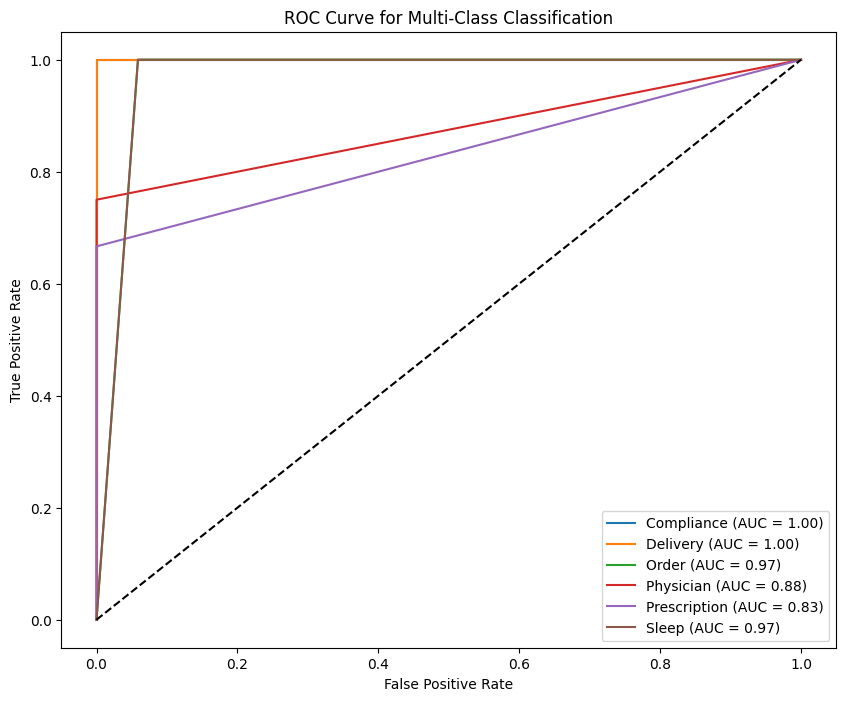

In [12]:
classifier = LLMClassifier()

subset = {k: cleaned_results[k] for k in list(cleaned_results.keys())[4:8]}

evaluation_results = classifier.evaluate_classification(cleaned_results)

In [13]:
evaluation_results

,precision,recall,f1-score,support,avg_confidence
Compliance,1.000000,1.000000,1.000000,4.000000,0.9375
Delivery,1.000000,1.000000,1.000000,2.000000,0.9000
Order,0.800000,1.000000,0.888889,4.000000,0.9375
Physician,1.000000,0.750000,0.857143,4.000000,0.9125
Prescription,1.000000,0.666667,0.800000,3.000000,0.9000
Sleep,0.800000,1.000000,0.888889,4.000000,0.9000
accuracy,0.904762,0.904762,0.904762,0.904762,NaN
macro avg,0.933333,0.902778,0.905820,21.000000,NaN
weighted avg,0.923810,0.904762,0.901890,21.000000,NaN
